In [2]:
import urllib
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd                       #pandas 유명한 라이브러리 한번 해볼 것
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# path에 들어가보면 8124개의 데이터가 출력됨
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data' 
raw_csv = urllib.request.urlopen(path) # comma-seperated values 
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)   #어떤 테이블안에 데이터를 넣는 것
print(len(df))

8124


In [3]:
df.head() #상위 5개 데이터만 보여줌

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
num_columns = df.shape[1] # dim 튜플에서 두번째 값
map_dic = {}
for i in range(num_columns):
    unique_array = df[i].unique()    #df[0]이면 p, e의 값을 갖는 8124개의 데이터 (첫번째 열의 데이터)  unique()가 데이터 종류 갯수 만큼 배열 생성
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [6]:
for i in range(1, num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)        
    df[i] = df[i].map(map_dic_sub)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,1,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,1,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [8]:
data_df = df.iloc[:, 1:] # :의 의미는 전체를 뜻함 이작업을 함으로써 레이블과 데이터를 구분  1:은 1이상을 의미

In [9]:
data_df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [10]:
data_array = data_df.as_matrix()

In [11]:
print(type(data_array), data_array.shape)

<class 'numpy.ndarray'> (8124, 22)


In [12]:
label_df = df.iloc[:, 0:1]

In [13]:
label_df.head()

,0
0,0
1,1
2,1
3,0
4,1


In [14]:
label_array = label_df.as_matrix()

In [15]:
print(type(label_array), label_array.shape)

<class 'numpy.ndarray'> (8124, 1)


In [16]:
label_array_one_hot = []
for i in label_array:
    if i == 0:
        one_hot = [1, 0]
    else:
        one_hot = [0, 1]
    label_array_one_hot.append(one_hot)    

In [17]:
label_array_one_hot =  np.array(label_array_one_hot)

In [18]:
print(type(label_array_one_hot), label_array_one_hot.shape)

<class 'numpy.ndarray'> (8124, 2)


In [19]:
label_array_one_hot

array([[1, 0],
       [0, 1],
       [0, 1],
       ..., 
       [0, 1],
       [1, 0],
       [0, 1]])

In [20]:
train = {'data': None, 'labels': None}
validation = {'data': None, 'labels': None}
test = {'data': None, 'labels': None}

In [27]:
import random
pick = random.random()
train_data = []
train_labels = []
validation_data = []
validation_labels = []
test_data = []
test_labels = []
for i in range(len(data_array)):
    pick = random.random()
    if pick < 0.80:
        train_data.append(data_array[i])
        train_labels.append(label_array_one_hot[i])
    elif pick >= 0.80 and pick < 0.85:
        validation_data.append(data_array[i])
        validation_labels.append(label_array_one_hot[i])
    elif pick >= 0.85:
        test_data.append(data_array[i])
        test_labels.append(label_array_one_hot[i])
        
train['data'] = np.array(train_data)
train['labels'] = np.array(train_labels)
validation['data'] = np.array(validation_data)
validation['labels'] = np.array(validation_labels)
test['data'] = np.array(test_data)
test['labels'] = np.array(test_labels)

In [29]:
print(train['data'].shape, train['labels'].shape)

(6531, 22) (6531, 2)


In [30]:
print(validation['data'].shape, validation['labels'].shape)

(437, 22) (437, 2)


In [31]:
print(test['data'].shape, test['labels'].shape)

(1156, 22) (1156, 2)


In [32]:
train['data'].shape[0]

6531

In [33]:
train['data'][0:50]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.        ,  0.22222222, ...,  0.125     ,
         0.2       ,  0.33333333],
       [ 0.        ,  0.33333333,  0.22222222, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.2       ,  0.33333333,  0.11111111, ...,  0.125     ,
         0.2       ,  0.33333333],
       [ 0.6       ,  0.        ,  0.        , ...,  0.        ,
         0.4       ,  0.16666667],
       [ 0.        ,  0.        ,  0.22222222, ...,  0.        ,
         0.        ,  0.16666667]])

Total batch: 131
Epoch:  0, Train Error: 15.45326, Validation Error: 15.20887, Test Accuracy: 0.48616
Epoch:  1, Train Error: 1.38557, Validation Error: 1.40184, Test Accuracy: 0.65917
Epoch:  2, Train Error: 0.64156, Validation Error: 0.68693, Test Accuracy: 0.74048
Epoch:  3, Train Error: 0.23624, Validation Error: 0.26561, Test Accuracy: 0.90225
Epoch:  4, Train Error: 0.16273, Validation Error: 0.19728, Test Accuracy: 0.94118
Epoch:  5, Train Error: 0.12519, Validation Error: 0.15467, Test Accuracy: 0.95415
Epoch:  6, Train Error: 0.10043, Validation Error: 0.12581, Test Accuracy: 0.95848
Epoch:  7, Train Error: 0.08328, Validation Error: 0.10801, Test Accuracy: 0.96540
Epoch:  8, Train Error: 0.07138, Validation Error: 0.09490, Test Accuracy: 0.97318
Epoch:  9, Train Error: 0.06266, Validation Error: 0.08571, Test Accuracy: 0.97578
Epoch: 10, Train Error: 0.05600, Validation Error: 0.07875, Test Accuracy: 0.97664
Epoch: 11, Train Error: 0.05000, Validation Error: 0.07288, Test Acc

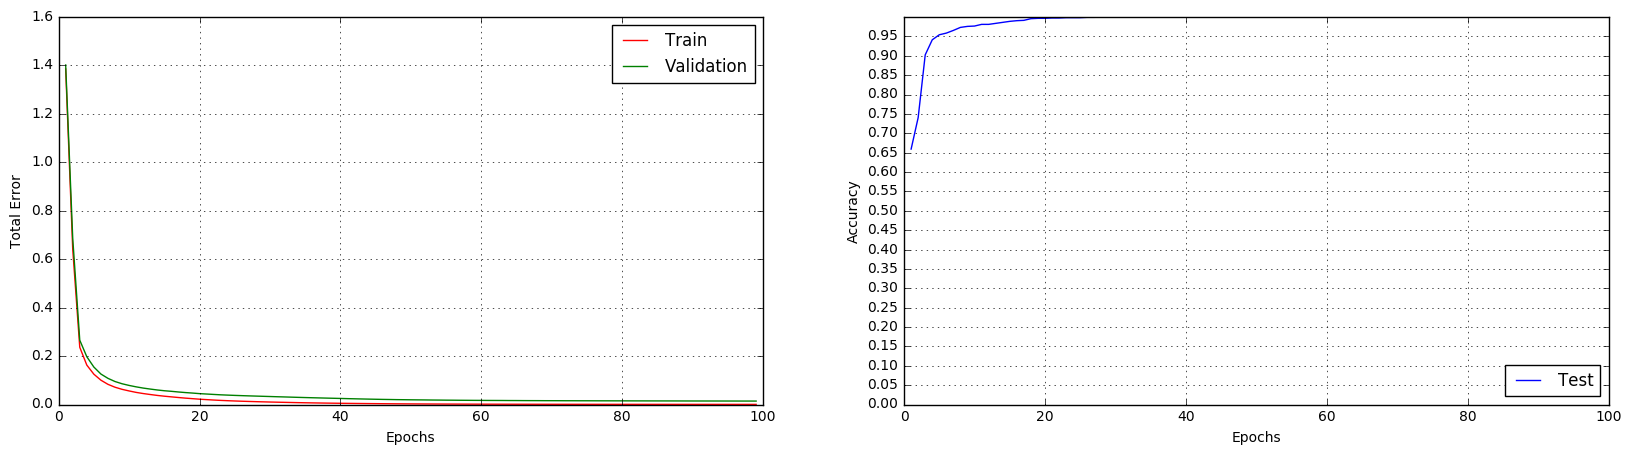

[1 1 1 ..., 1 0 1]
[1 1 1 ..., 1 0 1]
Number of False Prediction: 0


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

batch_size = 50  #배치사이즈가 트레이닝 데이터랑 딱 맞아 떨어지지 않을 때 어떻게 하지? - 자동으로 나머지 것만 들어감 31개가 마지막 배치에 있음
training_epochs = 100
learning_rate = 0.05

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 22 
n_hidden_1 = 22 
n_hidden_2 = 22 
n_classes = 2 
    
# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2ndHidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

def draw_error_values_and_accuracy():
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction():
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        


with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(train['data'].shape[0]/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: train['data'], y_target: train['labels']})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: validation['data'], y_target:  validation['labels']})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: test['data'], y_target: test['labels']})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        
        for i in range(total_batch):   # 토탈 train 개수가 소수라면 어떻게 처리?
            #버섯 데이터에는 batch_next함수가 없다. 따라서 이런식으로 했다.
            #처음에는 잘몰라서 그냥 모든 데이터를 130번씩 돌렸는데, 그냥 전체를 돌린거랑 현재꺼랑 얼마나 속도차이가 나는지  - 엄청나다 ! 
            batch_images = train['data'][i*batch_size:(i+1)*batch_size] 
            batch_labels = train['labels'][i*batch_size:(i+1)*batch_size]
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})


    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy()
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:test['data']})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:test['labels']})

    print(prediction)
    print(ground_truth)

    for i in range(test['data'].shape[0]):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    if(diff_index_list == 0):
        draw_false_prediction()